In [18]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [28]:
nx = 41
ny = 41
l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [29]:
phi = numpy.zeros((ny, nx))
w = numpy.zeros((ny, nx))

In [30]:
phi

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [31]:
phi

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [32]:
w

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:
def l1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [39]:
def stokesflow(phi, w, l1_target):
    l1_errorphi = 1
    l1_errorw = 1
    phin = numpy.empty_like(phi)
    wn = numpy.empty_like(w)
    while l1_errorphi > l1_target or l1_errorw > l1_target:
        phin = phi.copy()
        phi[1:-1,1:-1] = .25 * (phin[1:-1,2:] + phin[1:-1, :-2] \
                        + phin[2:, 1:-1] + phin[:-2, 1:-1])
        # boundary condition
        phi[0, :] = 0
        phi[-1, :] = 0
        phi[:, 0] = 0
        phi[:, -1] = 0
        
        l1_errorphi = l1norm(phi, phin)
        
        wn = w.copy()
        w[1:-1,1:-1] = .25 * (wn[1:-1,2:] + wn[1:-1, :-2] \
                       + wn[2:, 1:-1] + wn[:-2, 1:-1])
        # boundary condition
        #upper boundary
        w[0, :] = (-1/(2*dy**2))*(8*phi[1, :] - phi[2, :])\
                  - 3*1.0/dy
        #right boundary
        w[:, -1] = (-1/(2*dx**2))*(8*phi[:, -2] - phi[:, -3])\
                  - 3*0.0/dy
        
        #bottom boundary
        w[-1, :] = (-1/dy**2)*(4*phi[-1, :] - 2*phi[-3, :]-\
                    2*phi[-2, :]) - 6*0.0/dy
        
        #left boundary
        w[:, 0] = (-1/dx**2)*(4*phi[:, 0] - 2*phi[:, 1]-\
                    2*phi[:, 2]) - 6*0.0/dy
        
        l1_errorw = l1norm(w, wn)
    return phi, w

In [50]:
stokesflow(phi, w, l1_target)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ -0.00000000e+00,  -1.20000000e+02,  -1.20000000e+02, ...,
          -1.20000000e+02,  -1.20000000e+02,  -0.00000000e+00],
        [ -0.00000000e+00,  -5.99178693e+01,  -8.35537473e+01, ...,
          -8.35537473e+01,  -5.99178693e+01,  -0.00000000e+00],
        [ -0.00000000e+00,  -3.61177299e+01,  -5.96714818e+01, ...,
          -5.96714818e+01,  -3.61177299e+01,  -0.00000000e+00],
        ..., 
        [ -0.00000000e+00,  -1.64791161e-01,  -3.28518159e-01, ...,
          -3.28518159e-01,  -1.64791161e-01,  -0.00000000e+00],
        [ -0.00000000e+00,  -8.21306859e-02,  -1.63731583e-01, ...,
          -1.63731583e-01,  -8.21306859e-02,  -0.00000000e+00],
        [ -0.00000000e+00,  -0.00000000e

In [51]:
x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)
pyplot.figure(figsize=(8,6))
# 12 is the total number of levels we used to plot the contour
pyplot.contourf(x, y, w, 12, cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

NameError: name 'cm' is not defined

ValueError: could not convert string to float: 'w'

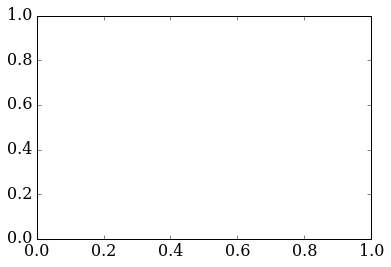

In [52]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('w')
pyplot.imshow(phi)
pyplot.colorbar()
pyplot.show()